# Analysis for IL_10

## Installing and importing the libraries

In [1]:
# installing the libraries 
# uncomment the lines below to make sure that the required libraries are installed
# install.packages("tidyverse")
# install.packages("ggthemes")
# install.packages("ggplot2")
# install.packages("dplyr")

# importing the libraries
library(tidyverse)
library(ggthemes)
library(ggplot2)
library(dplyr)
library(glue)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Reading the csv file with the result of the simulation

In [3]:
il_10 <- read_csv("il_10.csv")
head(il_10)

Rows: 2642 Columns: 15
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): type, previous_aa, new_aa_1l, new_aa_3l, conversion, new_seq, secon...
dbl (8): residue_number, fa_score, ddg_score, hbond_score, sasa_score, diff_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,residue_number,previous_aa,new_aa_1l,new_aa_3l,conversion,new_seq,fa_score,ddg_score,hbond_score,sasa_score,secondary_structure,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
wild_type,NA,NA,NA,NA,NA,NLPNMLRDLRDAFSRVKTFFDQLDNLLLKESLLEDFKGYLGCQALSEMIQFYLEEVMPQAENQDPDIKAHVNSLGENLKTLRLRLRRCHRFLPCENKSKAVEQVKNAFNKLQEKGIYKAMSEFDIFINYIEAYMTMKIR,122.8756,0.000000,98,12050.96,LHHHHHHHHHHHHHHHHHHLLLLLLLLLLHHHHHHHHLLLHHHHHHHHHHHHHHHHHHHHHHHLHHHHHHHHHHHHHHHHHHHHHHHLLLLLHHHLLLHHHHHHHHHHHHLHHHHHHHHHHLHHHHHHHHHHHHHHHHL,0,0.000000,0
mutant,1,N,A,ALA,1NtoA,ALPNMLRDLRDAFSRVKTFFDQLDNLLLKESLLEDFKGYLGCQALSEMIQFYLEEVMPQAENQDPDIKAHVNSLGENLKTLRLRLRRCHRFLPCENKSKAVEQVKNAFNKLQEKGIYKAMSEFDIFINYIEAYMTMKIR,131.7850,8.909365,98,12005.35,LHHHHHHHHHHHHHHHHHHLLLLLLLLLLHHHHHHHHLLLHHHHHHHHHHHHHHHHHHHHHHHLHHHHHHHHHHHHHHHHHHHHHHHLLLLLHHHLLLHHHHHHHHHHHHLHHHHHHHHHHLHHHHHHHHHHHHHHHHL,0,-45.613435,0
mutant,1,N,C,CYS,1NtoC,CLPNMLRDLRDAFSRVKTFFDQLDNLLLKESLLEDFKGYLGCQALSEMIQFYLEEVMPQAENQDPDIKAHVNSLGENLKTLRLRLRRCHRFLPCENKSKAVEQVKNAFNKLQEKGIYKAMSEFDIFINYIEAYMTMKIR,138.4468,15.571199,98,12033.74,LHHHHHHHHHHHHHHHHHHLLLLLLLLLLHHHHHHHHLLLHHHHHHHHHHHHHHHHHHHHHHHLHHHHHHHHHHHHHHHHHHHHHHHLLLLLHHHLLLHHHHHHHHHHHHLHHHHHHHHHHLHHHHHHHHHHHHHHHHL,0,-17.227059,0
mutant,1,N,D,ASP,1NtoD,DLPNMLRDLRDAFSRVKTFFDQLDNLLLKESLLEDFKGYLGCQALSEMIQFYLEEVMPQAENQDPDIKAHVNSLGENLKTLRLRLRRCHRFLPCENKSKAVEQVKNAFNKLQEKGIYKAMSEFDIFINYIEAYMTMKIR,132.3435,9.467917,98,12043.57,LHHHHHHHHHHHHHHHHHHLLLLLLLLLLHHHHHHHHLLLHHHHHHHHHHHHHHHHHHHHHHHLHHHHHHHHHHHHHHHHHHHHHHHLLLLLHHHLLLHHHHHHHHHHHHLHHHHHHHHHHLHHHHHHHHHHHHHHHHL,0,-7.397124,0
mutant,1,N,E,GLU,1NtoE,ELPNMLRDLRDAFSRVKTFFDQLDNLLLKESLLEDFKGYLGCQALSEMIQFYLEEVMPQAENQDPDIKAHVNSLGENLKTLRLRLRRCHRFLPCENKSKAVEQVKNAFNKLQEKGIYKAMSEFDIFINYIEAYMTMKIR,142.7852,19.909577,98,12055.52,LHHHHHHHHHHHHHHHHHHLLLLLLLLLLHHHHHHHHLLLHHHHHHHHHHHHHHHHHHHHHHHLHHHHHHHHHHHHHHHHHHHHHHHLLLLLHHHLLLHHHHHHHHHHHHLHHHHHHHHHHLHHHHHHHHHHHHHHHHL,0,4.560080,0
mutant,1,N,F,PHE,1NtoF,FLPNMLRDLRDAFSRVKTFFDQLDNLLLKESLLEDFKGYLGCQALSEMIQFYLEEVMPQAENQDPDIKAHVNSLGENLKTLRLRLRRCHRFLPCENKSKAVEQVKNAFNKLQEKGIYKAMSEFDIFINYIEAYMTMKIR,136.1603,13.284711,98,12107.81,LHHHHHHHHHHHHHHHHHHLLLLLLLLLLHHHHHHHHLLLHHHHHHHHHHHHHHHHHHHHHHHLHHHHHHHHHHHHHHHHHHHHHHHLLLLLHHHLLLHHHHHHHHHHHHLHHHHHHHHHHLHHHHHHHHHHHHHHHHL,0,56.848926,0


#### Removing the amino acid sequence and the secondary sequence to increase readability

In [4]:
il_10_short <- il_10 |> select(-c(new_seq, secondary_structure, conversion, new_aa_3l))
head(il_10_short)

type,residue_number,previous_aa,new_aa_1l,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wild_type,NA,NA,NA,122.8756,0.000000,98,12050.96,0,0.000000,0
mutant,1,N,A,131.7850,8.909365,98,12005.35,0,-45.613435,0
mutant,1,N,C,138.4468,15.571199,98,12033.74,0,-17.227059,0
mutant,1,N,D,132.3435,9.467917,98,12043.57,0,-7.397124,0
mutant,1,N,E,142.7852,19.909577,98,12055.52,0,4.560080,0
mutant,1,N,F,136.1603,13.284711,98,12107.81,0,56.848926,0


## General Analysis 

## Analysis on the delta delta G scores
Below is a histogram of the values
> Heavily skewed as expected

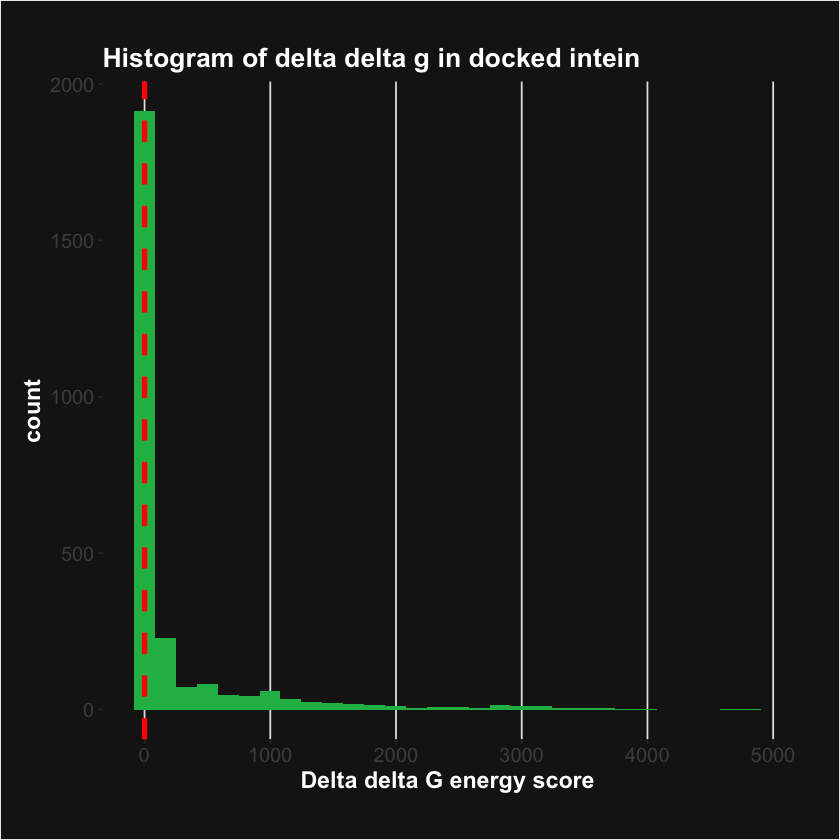

In [15]:
wildtype_ddg <- (il_10_short |> filter(type == "wild_type"))$ddg_score
il_10_short |> ggplot(aes(ddg_score)) + 
    geom_histogram(fill = "#1DB954", bins = 30) + 
    theme(plot.title = element_text(hjust = 0, size = 16, face = "bold", color = "white"),
        axis.title = element_text(size = 14, face = "bold", color = "white"),
        axis.text = element_text(size = 12),
        plot.background = element_rect(fill = "#191919"),
        panel.background = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.x = element_line(color = "gray90", linewidth = 0.5),
        panel.grid.minor.x = element_blank()) +
  ggtitle("Histogram of delta delta g in docked intein") +
  labs(x = "Delta delta G energy score", y = "count") +
  geom_vline(xintercept = wildtype_ddg, color = "red", size = 1.5, linetype = "dashed") +
  theme(plot.margin = unit(c(1, 1, 1, 0.5), "cm"))

### A look at the highest ΔΔG values 
> Among the top 100 ΔΔG values, **chaning a non-R amino acid to R conasiderably increase the ddg_score**

In [28]:
print("The table below shows the number of new amino acids that were added in the top 100 ddg scores")
top_ddg <- il_10_short |> arrange(desc(ddg_score))
table((top_ddg |> head(n = 100))$new_aa_1l)
top_ddg |> head(n = 8)

[1] "The table below shows the number of new amino acids that were added in the top 100 ddg scores"



 F  H  P  R  W  Y 
 6  2 71  1 13  7 

type,residue_number,previous_aa,new_aa_1l,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,87,R,P,4925.163,4802.287,97,11957.45,-1,-93.509831,2
mutant,118,K,P,4732.716,4609.840,97,12013.72,-1,-37.245652,0
mutant,139,R,P,4090.317,3967.441,97,11963.88,-1,-87.084351,1
mutant,105,K,P,3940.578,3817.702,97,11987.38,-1,-63.580987,0
mutant,97,K,P,3851.891,3729.016,98,12046.17,0,-4.791666,0
mutant,10,R,P,3820.726,3697.850,97,12021.11,-1,-29.855850,1
mutant,110,K,P,3753.280,3630.404,97,11994.50,-1,-56.461355,2
mutant,84,R,P,3736.448,3613.573,97,12006.73,-1,-44.228575,0


### A look at the lowest ΔΔG values 
> Placeholder

In [27]:
bottom_ddg <- il_10_short |> arrange(ddg_score)
print("*****************************")
print("The table below shows the number of new amino acids that were added the mutated position among the bottom 100 values of delta delta g")
table((bottom_ddg |> head(n = 100))$new_aa_1l)
print("*****************************")
print("*****************************")
print("The number of replaced amino acids that were removed in the event of a mutation among the bottom 100 ddg_score values")
table((bottom_ddg |> head(n = 100))$previous_aa)

bottom_ddg |> head(n = 8)

[1] "*****************************"
[1] "The table below shows the number of new amino acids that were added the mutated position among the bottom 100 values of delta delta g"



 A  C  D  E  F  G  H  I  L  N  S  T  V  W  Y 
23  5  9  2  4 17  7  1  2  5 11  6  1  1  6 

[1] "*****************************"
[1] "*****************************"
[1] "The number of replaced amino acids that were removed in the event of a mutation among the bottom 100 ddg_score values"



 C  D  E  G  I  K  L  M  N  P  Q  R  T  Y 
 1  3 13  1  4  7 20  7  3  8  9 14  1  9 

type,residue_number,previous_aa,new_aa_1l,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,26,L,A,102.0486,-20.82702,98,12010.37,0,-40.594481,0
mutant,26,L,G,104.3972,-18.47841,98,12005.58,0,-45.383114,0
mutant,83,L,A,105.3130,-17.56261,98,12027.04,0,-23.920505,0
mutant,83,L,G,107.0129,-15.86274,98,12012.08,0,-38.884935,0
mutant,24,D,G,108.3001,-14.57544,98,12009.52,0,-41.441354,0
mutant,26,L,N,109.3142,-13.56141,98,12041.31,0,-9.656123,0
mutant,39,Y,A,109.3266,-13.54894,98,11978.51,0,-72.451867,0
mutant,39,Y,G,110.4653,-12.41033,98,11963.45,0,-87.510010,0
